# Air Quality Index Prediction 

### 1. Understanding the Data 

#### 1.1 Importing Libraries and Dataset

In [1]:
#loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter

# ML MODELS
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier,XGBRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsRegressor


#### 1.2 Getting Description and Schema reading csv file and analyzing the parameters 

In [2]:
data  = pd.read_csv("city_day.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


#### 1.3 Statistical Description of Numerical Columns

In [4]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


### 2. Data Cleaning and Pre-Processing Dealing with the NULL values

In [5]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

##### Counting the entries city wise

In [6]:
#Dataset available for each city in descending order
#Enteries of data, grouped into cities
data.groupby('City').size().sort_values(ascending=False)

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
dtype: int64

In [7]:
#Removing the rows with NULL AQI values
data = data.dropna(subset=['AQI'])

In [ ]:
cor = data.corr()
cor.style.background_gradient(cmap='coolwarm')

#### Droping the non requried parameters

In [9]:
data.drop(['Benzene','Toluene','Xylene','Date'],axis='columns',inplace=True)
data


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
28,Ahmedabad,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,209.0,Poor
29,Ahmedabad,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,328.0,Very Poor
30,Ahmedabad,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,514.0,Severe
31,Ahmedabad,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,782.0,Severe
32,Ahmedabad,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,54.0,Satisfactory


##### Analyzing the different types of Air-Quality

In [10]:
df=data.copy()


In [11]:
df['AQI_Bucket'].unique() # getting the unique values of AOI Bucket.

array(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

##### Categorizing the Air-Quality with respect to the AQI index of the air and checking for NULL values

In [12]:
# checking the Null values for AQI of 0 - 50  range.
good=df[(df.AQI >0)&(df.AQI <=50)]
good["AQI_Bucket"].isnull().sum()

0

In [13]:
# checking the Null values for AQI of 51 - 100  range.
Satisfactory=df[(df.AQI >50)&(df.AQI <=100)]
Satisfactory["AQI_Bucket"].isnull().sum()

0

In [14]:
# checking the Null values for AQI of 101 - 200  range.
Moderate=df[(df.AQI >100)&(df.AQI <=200)]
Moderate["AQI_Bucket"].isnull().sum()

0

In [15]:
# checking the Null values for AQI of 201 - 300  range.
poor=df[(df.AQI >200)&(df.AQI <=300)]
poor["AQI_Bucket"].isnull().sum()

0

In [16]:
# checking the Null values for AQI of 301 - 400  range.
vpoor=df[(df.AQI >300)&(df.AQI <=400)]
vpoor["AQI_Bucket"].isnull().sum()

0

In [17]:
# checking the Null values for AQI of above 400 range.
sever=df[(df.AQI >400)]
sever["AQI_Bucket"].isnull().sum()

0

#### Checking the null values.

In [18]:
df.isnull().sum() 


City             0
PM2.5          678
PM10          7086
NO             387
NO2            391
NOx           1857
NH3           6536
CO             445
SO2            605
O3             807
AQI              0
AQI_Bucket       0
dtype: int64

##### Analyzing the data with respect to the pollutant PM2.5 values

In [19]:
# Arranging city wise PM 2.5 levels mean values
pm2_51=df.groupby("City")["PM2.5"].mean().round()
pm2_51

City
Ahmedabad              68.0
Aizawl                 17.0
Amaravati              38.0
Amritsar               55.0
Bengaluru              36.0
Bhopal                 50.0
Brajrajnagar           64.0
Chandigarh             41.0
Chennai                50.0
Coimbatore             29.0
Delhi                 118.0
Ernakulam              25.0
Gurugram              116.0
Guwahati               61.0
Hyderabad              47.0
Jaipur                 55.0
Jorapokhar             64.0
Kochi                  32.0
Kolkata                65.0
Lucknow               110.0
Mumbai                 35.0
Patna                 125.0
Shillong               25.0
Talcher                62.0
Thiruvananthapuram     28.0
Visakhapatnam          48.0
Name: PM2.5, dtype: float64

In [20]:
# Selecting the top 10 cities having high average PM 2.5 level.
pm2_51.sort_values(ascending=False).head(10)

City
Patna           125.0
Delhi           118.0
Gurugram        116.0
Lucknow         110.0
Ahmedabad        68.0
Kolkata          65.0
Brajrajnagar     64.0
Jorapokhar       64.0
Talcher          62.0
Guwahati         61.0
Name: PM2.5, dtype: float64

### Analyzing the missing values City wise

##### Checking for missing values for each parameter for  different cities

In [21]:
#Determining the percentage of missing values of columns with respect to cities.

#missing values of each column with respective to that city
group_city  = data.groupby("City")

#Empty list to store dataframe for each city
dfs = [ ]

for city, subset in group_city:
    missing_values_count = subset.isnull().sum()
    total_rows = subset.shape[0]
    missing_values_percentage = (missing_values_count / total_rows) * 100
    
    #Dataframe for current city
    city_missing_values_df = pd.DataFrame({
        'City': city,
        'Column': missing_values_count.index,
        'Missing Values': missing_values_count.values,
        'Missing Values Percentage': missing_values_percentage.values
    })
    
    
    dfs.append(city_missing_values_df)
    
missing_values_df = pd.concat(dfs, ignore_index=True)
        
print('Dataframe of missing values ')
missing_values_df

Dataframe of missing values 


,City,Column,Missing Values,Missing Values Percentage
0,Ahmedabad,City,0,0.000000
1,Ahmedabad,PM2.5,2,0.149925
2,Ahmedabad,PM10,937,70.239880
3,Ahmedabad,NO,7,0.524738
4,Ahmedabad,NO2,7,0.524738
...,...,...,...,...
307,Visakhapatnam,CO,6,0.512383
308,Visakhapatnam,SO2,7,0.597780
309,Visakhapatnam,O3,5,0.426985
310,Visakhapatnam,AQI,0,0.000000


##### Plotting the graph of missing values in percentage statistics

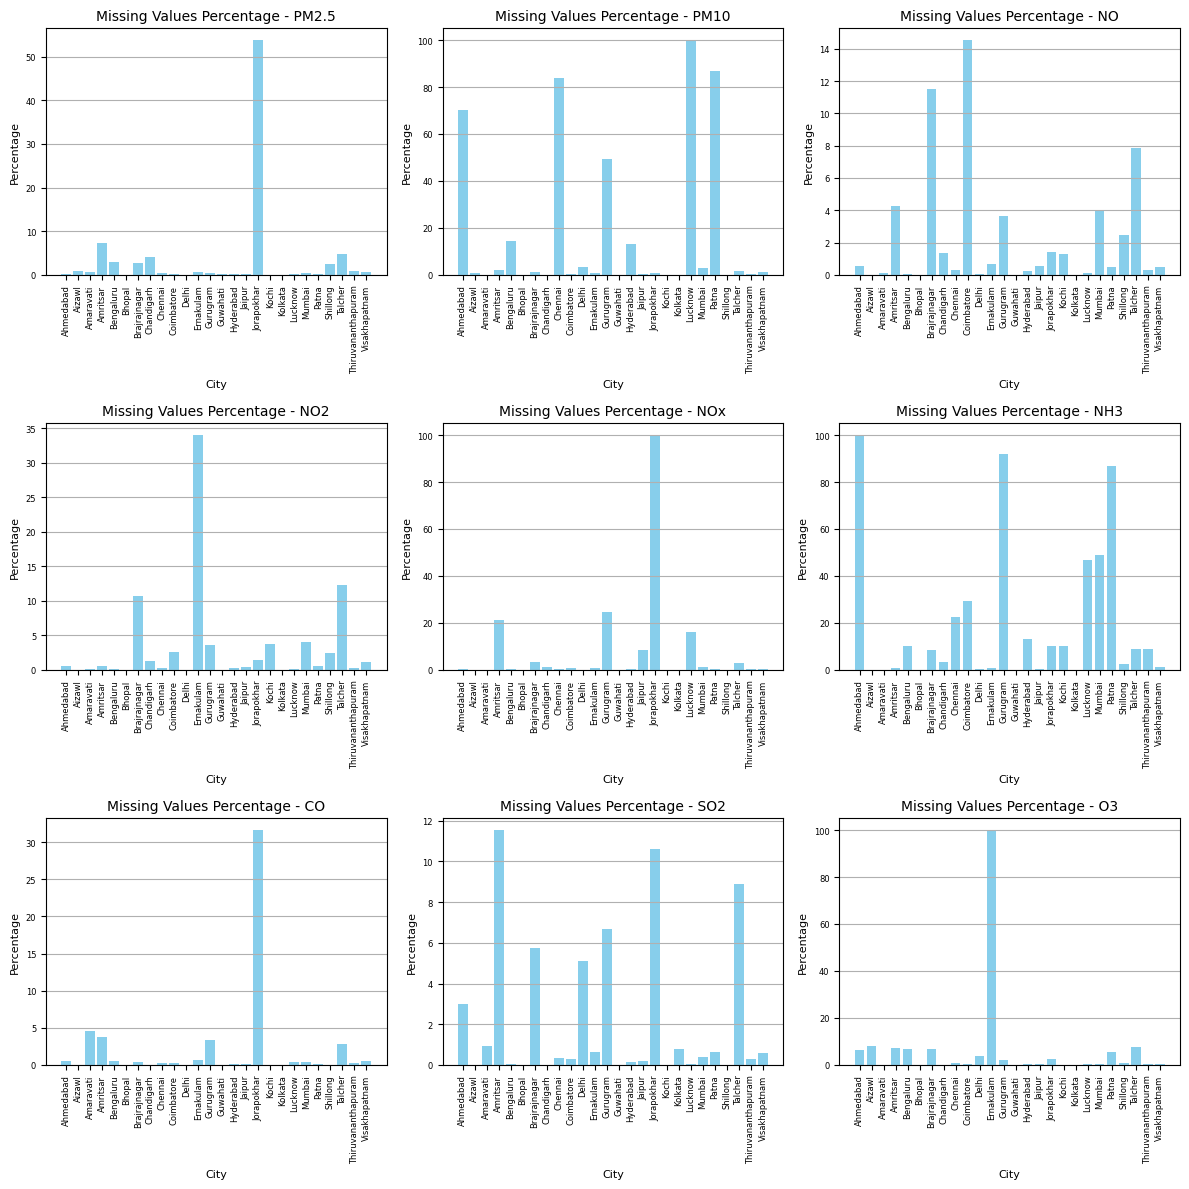

In [22]:
#bar plot to analyse the percentage of missing values with respect to each city


import matplotlib.pyplot as plt

columns = data.columns[1:10]
num_columns = len(columns)
num_rows = (num_columns + 2) // 3  # Number of rows in the grid layout
num_cols = 3  # Number of columns in the grid layout

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    city_names = missing_values_df.loc[missing_values_df['Column'] == column, 'City']
    missing_percentage = missing_values_df.loc[missing_values_df['Column'] == column, 'Missing Values Percentage']
    ax.bar(city_names, missing_percentage, color='skyblue')
    ax.set_title(f"Missing Values Percentage - {column}", fontsize=10)
    ax.set_xlabel("City", fontsize=8)
    ax.set_ylabel("Percentage", fontsize=8)
    ax.set_xticks(range(len(city_names)))
    ax.set_xticklabels(city_names, rotation=90, fontsize=6)
    ax.grid(axis='y')
    ax.tick_params(axis='both', labelsize=6)

# Remove empty subplots
if num_columns % num_cols != 0:
    for i in range(num_columns % num_cols, num_cols):
        fig.delaxes(axs[-1, i])

plt.tight_layout()
plt.show()


##### Filling the missing values

1. Create bins of each column for each city
2. Plot the histogram - which shows the range of values which occured maximum time in a column for a particular city.(also it shows the skewness)
3. Observe the highest occurred range of values for a column of a particular city.
4. Finding the mean of that range.
5. Filling the missing values with the mean of range of values which occurred maximum times for a column.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Create a dictionary to store the mean of the highest frequency bin for each column and city
mean_per_bin = {}

# Group the data by 'City' column
grouped_data = data.groupby('City')

# Set the number of columns for the subplot arrangement
num_columns = 3

# Iterate over each city
for city, subset in grouped_data:
    if city == "Ahmedabad":
        # Get the number of columns for this city
        num_rows = np.ceil(len(subset.columns[2:-1]) / num_columns).astype(int)

        # Create subplots for the city
        fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
        axs = axs.flatten()

        # Iterate over the columns to fill
        for i, column in enumerate(subset.columns[2:-1]):  # Exclude 'City', 'Date', and 'AQI_Bucket' columns
            ax = axs[i]

            # Calculate the number of bins
            num_bins = int(np.sqrt(len(subset)))

            # Calculate the subplot index
            subplot_index = i % (num_columns * num_rows) + 1

            # Plot the histogram and calculate the skewness
            ax.hist(subset[column].dropna(), bins=num_bins, alpha=0.5)
            ax.set_title(f"{column} - {city}")
            ax.set_xlabel(column)
            ax.set_ylabel("Frequency")

            try:
                # Calculate skewness
                column_data = subset[column]
                column_data_cleaned = column_data.dropna()
                column_skewness = skew(column_data_cleaned)
            except (RuntimeWarning, ZeroDivisionError):
                column_skewness = float('nan')

            # Add text indicating skewness
            skewness_text = "Skewed (right-tailed)" if column_skewness > 0 else "Skewed (left-tailed)" if column_skewness < 0 else "Unskewed"
            ax.text(0.5, 0.9, f"Skewness: {column_skewness:.2f}\nDistribution: {skewness_text}",
                    transform=ax.transAxes, fontsize=10, ha='center')

            # Calculate the bin with the highest frequency
            counts, bins, _ = ax.hist(column_data_cleaned, bins=num_bins, alpha=0.5)
            max_bin = bins[np.argmax(counts)]

            # Calculate the mean of the highest frequency bin
            bin_mean = column_data[(column_data >= max_bin) & (column_data < max_bin + (bins[1] - bins[0]))].mean()

            # Store the mean in the dictionary
            mean_per_bin[(city, column)] = bin_mean

        # Remove empty subplots
        if len(subset.columns[2:-1]) < num_columns * num_rows:
            for i in range(len(subset.columns[2:-1]), num_columns * num_rows):
                fig.delaxes(axs[i])

        # Adjust spacing between subplots
        fig.tight_layout()

# Fill the missing values with the mean of the highest frequency bin for each column and city
for (city, column), mean in mean_per_bin.items():
    data.loc[(data['City'] == city) & (data[column].isna()), column] = mean

plt.show()


 It fills the remaining miising values with the overall mean of that column
(There were left some missing values beacause for some city there is no values present for a column)

In [24]:
data.isnull().sum()

City             0
PM2.5          678
PM10          6149
NO             380
NO2            384
NOx           1855
NH3           6536
CO             438
SO2            565
O3             722
AQI              0
AQI_Bucket       0
dtype: int64

In [25]:
# Calculate the overall mean of each numeric column
column_means = data.select_dtypes(include='number').mean()

# Fill the missing values in each numeric column with the corresponding column mean
data_filled = data.select_dtypes(include='number').fillna(column_means)

# Combine the filled numeric columns with the non-numeric columns
data = pd.concat([data_filled, data.select_dtypes(exclude='number')], axis=1)

# Export the updated dataset to Excel
#data_filled.to_excel('data_filled_with_mean.xlsx', index=False)

In [26]:
data.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
City          0
AQI_Bucket    0
dtype: int64

In [27]:

df=data.copy()
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,City,AQI_Bucket
28,83.13,88.179286,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,209.0,Ahmedabad,Poor
29,79.84,88.179286,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,328.0,Ahmedabad,Very Poor
30,94.52,88.179286,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,514.0,Ahmedabad,Severe
31,135.99,88.179286,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,782.0,Ahmedabad,Severe
32,178.33,88.179286,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,914.0,Ahmedabad,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0,Visakhapatnam,Good
29527,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0,Visakhapatnam,Satisfactory
29528,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0,Visakhapatnam,Satisfactory
29529,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,54.0,Visakhapatnam,Satisfactory


##### Example of analyzing the pollutant values of cities

<AxesSubplot: title={'center': 'PM 2.5 Levels in different cities'}, xlabel='Level', ylabel='City'>

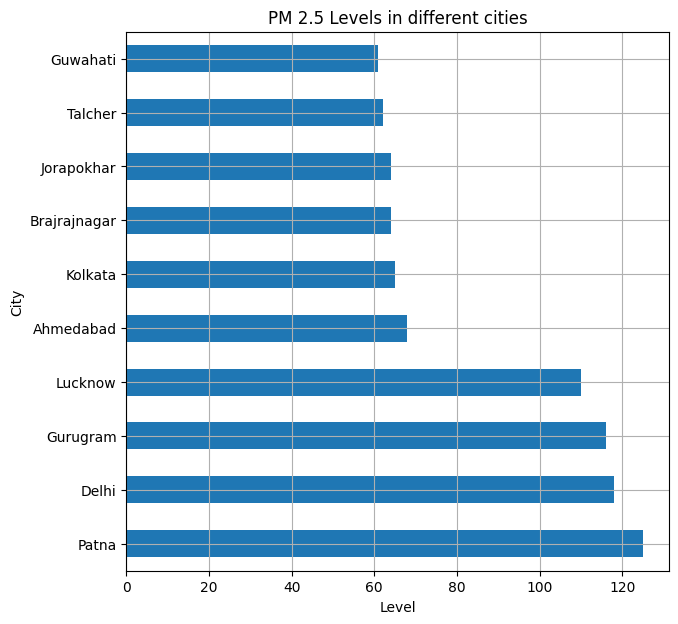

In [28]:
# Plotting the horizontal bar plot for cities against PM 2.5 level value.
pm2_51.sort_values(ascending=False).head(10) .plot(figsize=(7,7),kind="barh",title="PM 2.5 Levels in different cities", xlabel="Level", ylabel="City",grid=True)

### Bar graph of average AQI values of each city

In [29]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,City,AQI_Bucket
28,83.13,88.179286,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,209.0,Ahmedabad,Poor
29,79.84,88.179286,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,328.0,Ahmedabad,Very Poor
30,94.52,88.179286,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,514.0,Ahmedabad,Severe
31,135.99,88.179286,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,782.0,Ahmedabad,Severe
32,178.33,88.179286,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,914.0,Ahmedabad,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0,Visakhapatnam,Good
29527,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0,Visakhapatnam,Satisfactory
29528,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0,Visakhapatnam,Satisfactory
29529,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,54.0,Visakhapatnam,Satisfactory


In [ ]:
# obtaining the data of city wise mean AQI index and arranging it in descending order.
aqi=df.groupby("City").mean()["AQI"].round().sort_values(ascending=False)
# Plotting the horizontal plot of  top 10 cities against high AQI value,

aqi.plot(figsize=(7,7),kind="barh",title="AQI (Greater the index bad is the quality of AIR)", xlabel="City", ylabel="AQI",grid=True)
print(aqi)

##### Grouping the dataset into cities

In [31]:
# Getting the data of Cities with AQI mean values.
AQIB=df.groupby("City")["AQI"].mean()

##### As grouping the dataset into cities will make index as city column so we need to give the proper indexing

In [32]:
# Resetting the index values of dataset.
AQIB=AQIB.reset_index()
AQIB

,City,AQI
0,Ahmedabad,452.122939
1,Aizawl,34.765766
2,Amaravati,95.299643
3,Amritsar,119.920959
4,Bengaluru,94.318325
5,Bhopal,132.827338
6,Brajrajnagar,150.280505
7,Chandigarh,96.498328
8,Chennai,114.502654
9,Coimbatore,73.023256


## AQI Category (Range)
###### Good (0-50)
###### Satisfactory (51-100)
###### Moderate (101-200)
###### Poor (201-300)
###### Very poor (301-400)
###### Severe (401-500)

##### function to determine the AQI_Bucket values(Air-Quality) from AQI index values

In [33]:
# Programming a function which will compare the values of AQI and gives its respective remark in next columns.
def categorise(row):
    if row['AQI'] > 0 and row['AQI'] <= 50:
        return 'Good'
    elif row['AQI'] > 50 and row['AQI'] <= 100:
        return 'Satisfactory'
    elif row['AQI'] > 100 and row['AQI'] <= 200:
        return 'Moderate'
    elif row['AQI'] > 200 and row['AQI'] <= 300:
        return 'Poor'
    elif row['AQI'] > 300 and row['AQI'] <= 400:
        return 'Very Poor'
    return 'Sever'

##### Filling the empty values of Air_Bucket by  using the above function 

In [34]:
# Applying the values on AQIB Bucket.
AQIB['AQI_Bucket'] = AQIB.apply(lambda row: categorise(row), axis=1)

In [35]:
# Changing the index to City.
AQIB.set_index(AQIB["City"],inplace=True)

In [36]:
# Dropping the extra City Column.
AQIB.drop("City",axis=1)

,AQI,AQI_Bucket
City,,
Ahmedabad,452.122939,Sever
Aizawl,34.765766,Good
Amaravati,95.299643,Satisfactory
Amritsar,119.920959,Moderate
Bengaluru,94.318325,Satisfactory
Bhopal,132.827338,Moderate
Brajrajnagar,150.280505,Moderate
Chandigarh,96.498328,Satisfactory
Chennai,114.502654,Moderate


In [37]:
# Getting the value counts of AQI Bucket.
AQIB1=AQIB["AQI_Bucket"].value_counts()
AQIB1

Moderate        13
Satisfactory     7
Poor             4
Sever            1
Good             1
Name: AQI_Bucket, dtype: int64

##### PLotting the graph of count of cities grouping by Air-Quality

Moderate        13
Satisfactory     7
Poor             4
Sever            1
Good             1
Name: AQI_Bucket, dtype: int64


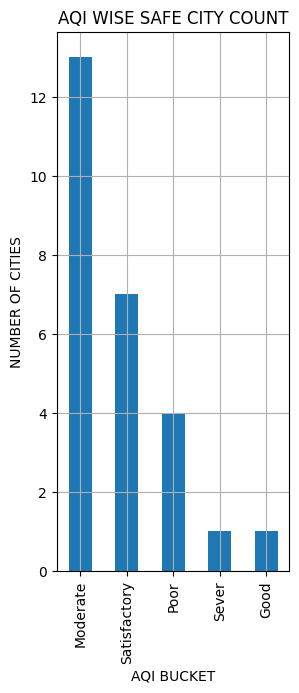

In [38]:
# Plotting the bar plot of  AQI Bucket with repeating count from data.,
AQIB1.plot(figsize=(3,7),kind="bar",title="AQI WISE SAFE CITY COUNT", xlabel="AQI BUCKET", ylabel="NUMBER OF CITIES",grid=True)
print(AQIB1)


##### Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3) and find how these contents correlated with AQI (air quality index)

In [39]:
df = data.copy()
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AQI                           24850 non-null  float64
 1   City                          24850 non-null  object 
 2   AQI_Bucket                    24850 non-null  object 
 3   Vehicular Pollution content   24850 non-null  float64
 4   Industrial Pollution content  24850 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.1+ MB


## Encoding


#### Encoding the values of string columns so we can use it to train the model 

In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df1=data.copy()
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))
df1.info()

categorical_attributes ['City', 'AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24850 non-null  float64
 1   PM10        24850 non-null  float64
 2   NO          24850 non-null  float64
 3   NO2         24850 non-null  float64
 4   NOx         24850 non-null  float64
 5   NH3         24850 non-null  float64
 6   CO          24850 non-null  float64
 7   SO2         24850 non-null  float64
 8   O3          24850 non-null  float64
 9   AQI         24850 non-null  float64
 10  City        24850 non-null  int32  
 11  AQI_Bucket  24850 non-null  int32  
dtypes: float64(10), int32(2)
memory usage: 2.3 MB


##### Splitting the test and train dataset

In [41]:
from sklearn.model_selection import train_test_split
y = df1["AQI_Bucket"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [42]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 6144, 3: 5754, 2: 1981, 5: 1641, 4: 955, 0: 920})


### Data Imbalance:
Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [43]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({3: 6144, 0: 6144, 2: 6144, 1: 6144, 5: 6144, 4: 6144})


## MODEL TRAINING

##### using ShuffleSplit and cross_val_score to get the score of the defined model

In [44]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2)
cross_val_score(LinearRegression(),x_train,y_train,cv=cv)

array([0.44322098, 0.43314788, 0.44470954, 0.43903673, 0.43978475])

##### defining the various models with the  different hyperparameter to get the  best  score of each model with suitable parameters

In [45]:
def find_best_model_gridsearchcv(x, y):
    algos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'parameter': {
            # 'normalize': ['True', 'False']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'parameter': {
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'parameter': {
            'alpha': [1, 2],
            'selection': ['random', 'cyclic']
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'parameter': {
            'criterion': ['squared_error', 'friedman_mse', 'poisson'],
            'splitter': ['best', 'random']
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'parameter': {
            'n_estimators': [100, 200],
            'max_depth': [5],
            'min_samples_split': [2, 5]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'parameter': {
            'n_estimators': [100, 200],
            'max_depth': [5],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'parameter': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05],
            'max_depth': [3, 5]
        }
    },
    'XGBC': {
        'model': XGBClassifier(),
        'parameter': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05],
            'max_depth': [3, 5]
        }
    },
    # 'SVC': {
    #     'model': SVC(),
    #     'parameter': {
    #         'C': [0.1, 1, 10],
    #         'kernel': ['linear', 'rbf']
    #     }
    # },
    # 'SVR': {
    #     'model': SVR(),
    #     'parameter': {
    #         'C': [0.1, 1, 10],
    #         'kernel': ['linear', 'rbf']
    #     }
    # },
    'KNN': {
        'model': KNeighborsRegressor(),
        'parameter': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'XGBR': {
        'model': XGBRegressor(),
        'parameter': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05],
            'max_depth': [3, 5]
        }
    }
    }


    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=False)

    for model_name, parameter in algos.items():
        clf = GridSearchCV(parameter['model'], parameter['parameter'], cv=cv, return_train_score=False)
        clf.fit(x, y)
        score.append({
            'model': model_name,
            'score': clf.best_score_,
            'parameter': clf.best_params_
        })

    return pd.DataFrame(score, columns=['model', 'score', 'parameter'])


##### Function to plot the graph to compare the score of different models

In [46]:
def plot_model_scores(scores_df):
    plt.figure(figsize=(10, 6))
    plt.bar(scores_df['model'], scores_df['score'], color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Scores')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

In [ ]:
scores_df = find_best_model_gridsearchcv(x_train,y_train)
scores_df


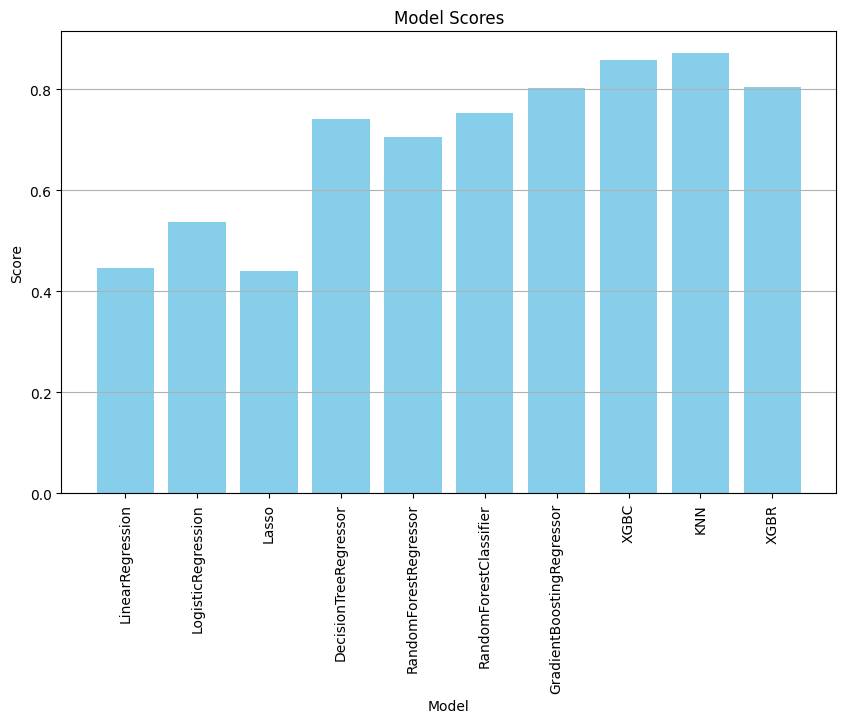

In [48]:
plot_model_scores(scores_df)

# Conclusion related to the above results.



1.   Delhi is the most polluted city in terms of vehicular pollution contents.
2.   Ahmedabad is the most polluted city in terms of industrial pollution content.
3.  City with High level values of AQI - Ahmedabad
4.   PM 2.5 count per day (highest value) - Delhi